In [118]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import yaml

import sys
sys.path.insert(0, r"../helper")

from visualisation.colour import *


In [119]:
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{68}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{70}/metrics.csv')

#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{72}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{87}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{96}/metrics.csv')



In [136]:
the_dir = "../examples/example_results/lightning_logs/hyperpara_and_loss/version_0"

tmp_path = os.path.join(the_dir, "final_plots")
os.makedirs(tmp_path, exist_ok=True)

df = pd.read_csv(os.path.join(the_dir, 'metrics.csv'))
df

,lr-SGD,step,val_acc,val_f1_macro,val_f1_micro,val_prec,val_rec,val_ce_loss,val_cc,val_loss,...,train_acc,train_f1_macro,train_f1_micro,train_prec,train_rec,train_ce_loss,train_cc,train_loss,unpruned,unpruned_state
0,0.001000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,312,0.490571,0.433730,0.64,0.405045,0.490571,0.982481,0.812500,5.044981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.460135,0.409738,0.6528,0.398476,0.460135,0.978690,0.811175,5.034566,5980.0,-1.0
3,0.001000,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,625,0.523841,0.461179,0.68,0.424259,0.523841,0.922963,0.843750,5.141713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502591,0.456916,0.7054,0.441437,0.502591,0.844043,0.822775,4.957917,5980.0,-1.0
6,0.000999,626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,938,0.539556,0.508843,0.70,0.531691,0.539556,0.903049,0.890625,5.356174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.540280,0.501242,0.7268,0.500173,0.540280,0.787776,0.862200,5.098776,5980.0,-1.0
9,0.000998,939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
stream = open(os.path.join(the_dir, 'hparams.yaml'), 'r')
data = yaml.load(stream, Loader=yaml.Loader)
data

{'kwargs': {'model_kwargs': {'base_lr': 0.001,
   'cc_metric': 'l2_torch',
   'cc_weight': 5,
   'ci_metric': 'l2',
   'cm_metric': 'not implemented yet',
   'criterion': CrossEntropyLoss(),
   'grid_size': 324,
   'in_channels': 1,
   'lr_update': 100,
   'min_lr': 1e-05,
   'momentum': 0.9,
   'n_classes': 4,
   'new_cc_mode': True,
   'optimizer': 'sgd',
   'out_dim': [1, 8, 16, 32, 4],
   'pretrain_epochs': 5,
   'prune_keep': 0.9,
   'prune_keep_total': 0.4,
   'update_every_nth_epoch': 5},
  'train_kwargs': {'batch_size': 16,
   'dataset': 'octmnist',
   'device': 'cuda',
   'epochs': 30,
   'exp_name': 'hyperpara_and_loss',
   'img_size': 28,
   'input_data_csv': ['data_prep/data_octa500.csv'],
   'load_ckpt_file': 'version_16/checkpoints/mu_epoch=8-val_f1_macro=0.64-unpruned=2373.ckpt',
   'load_mode': True,
   'log_every_n_steps': 50,
   'num_workers': 0,
   'octa500_id': 199,
   'p_augment': 0.2,
   'result_path': 'examples/example_results',
   'test_size': 50,
   'train_size

In [138]:
cc_metric = data['kwargs']['model_kwargs']['cc_metric']

In [139]:
ci_metric = data['kwargs']['model_kwargs']['ci_metric']

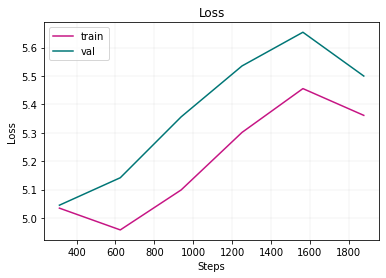

In [140]:
# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_loss']].dropna()
x_val = val_df['step']
y_val = val_df['val_loss']

train_df = df[['step', 'train_loss']].dropna()
x_train = train_df['step']
y_train = train_df['train_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
#ax.set_ylim([0,1.2])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_loss.png'))

# Show the plot
plt.show()



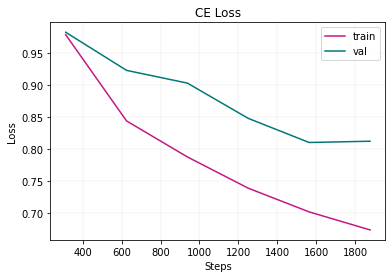

In [141]:
# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_ce_loss']].dropna()
x_val = val_df['step']
y_val = val_df['val_ce_loss']

train_df = df[['step', 'train_ce_loss']].dropna()
x_train = train_df['step']
y_train = train_df['train_ce_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('CE Loss')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
#ax.set_ylim([0,1.2])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_ce_loss.png'))

# Show the plot
plt.show()



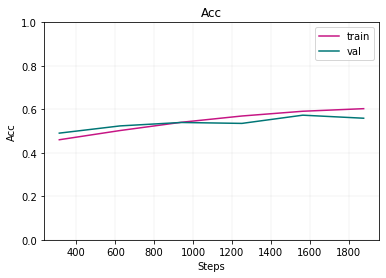

In [142]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_acc']].dropna()
x_val = val_df['step']
y_val = val_df['val_acc']

train_df = df[['step', 'train_acc']].dropna()
x_train = train_df['step']
y_train = train_df['train_acc']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Acc')
plt.title('Acc')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])


plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_acc.png'))


# Show the plot
plt.show()


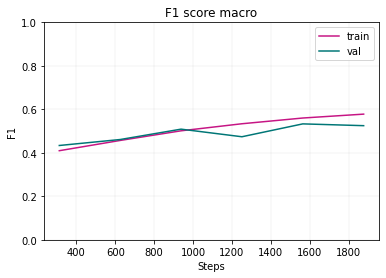

In [143]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_f1_macro']].dropna()
x_val = val_df['step']
y_val = val_df['val_f1_macro']

train_df = df[['step', 'train_f1_macro']].dropna()
x_train = train_df['step']
y_train = train_df['train_f1_macro']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('F1')
plt.title('F1 score macro')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_f1_macro.png'))

# Show the plot
plt.show()


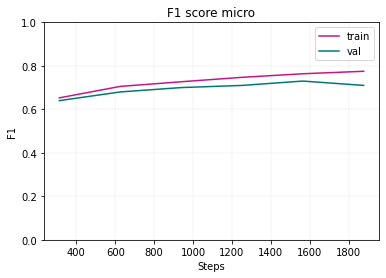

In [144]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_f1_micro']].dropna()
x_val = val_df['step']
y_val = val_df['val_f1_micro']

train_df = df[['step', 'train_f1_micro']].dropna()
x_train = train_df['step']
y_train = train_df['train_f1_micro']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('F1')
plt.title('F1 score micro')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_f1_micro.png'))

# Show the plot
plt.show()


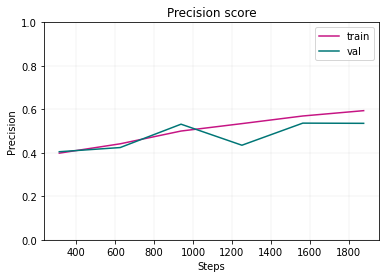

In [145]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_prec']].dropna()
x_val = val_df['step']
y_val = val_df['val_prec']

train_df = df[['step', 'train_prec']].dropna()
x_train = train_df['step']
y_train = train_df['train_prec']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Precision')
plt.title('Precision score')
plt.grid(color='k', linestyle='-', linewidth=0.05)


ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_prec.png'))


# Show the plot
plt.show()


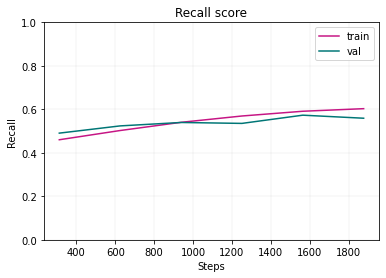

In [146]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_rec']].dropna()
x_val = val_df['step']
y_val = val_df['val_rec']

train_df = df[['step', 'train_rec']].dropna()
x_train = train_df['step']
y_train = train_df['train_rec']


# Create a line plot
plt.plot(x_train, y_train, label="train", color=variint_map_b.colors[-1])
plt.plot(x_val, y_val, label="val", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Recall')
plt.title('Recall score')
plt.grid(color='k', linestyle='-', linewidth=0.05)


ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_rec.png'))


# Show the plot
plt.show()


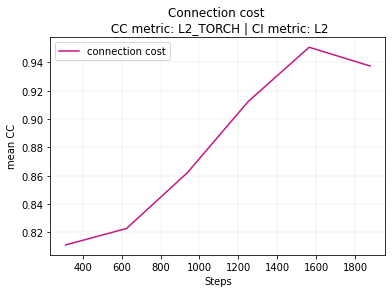

In [147]:
# todo: see how this changes without cc in loss and random pruning!!

import matplotlib.pyplot as plt

train_df = df[['step', 'train_cc']].dropna()
x_train = train_df['step']
y_train = train_df['train_cc']


# Create a line plot
plt.plot(x_train, y_train, label="connection cost", color=variint_map_b.colors[-1])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('mean CC')
plt.title(f'Connection cost \n CC metric: {cc_metric.upper()} | CI metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_cc.png'))


# Show the plot
plt.show()


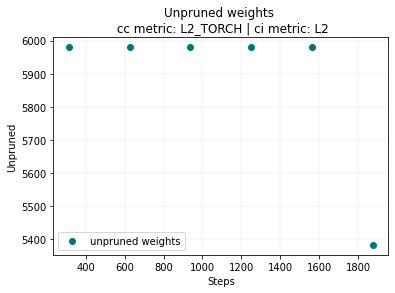

In [148]:
import matplotlib.pyplot as plt

train_df = df[['step', 'unpruned']].dropna()
x_train = train_df['step']
y_train = train_df['unpruned']


# Create a line plot
plt.scatter(x_train, y_train, label="unpruned weights", color=variint_map_b.colors[0])

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Unpruned')
plt.title(f'Unpruned weights \n cc metric: {cc_metric.upper()} | ci metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(tmp_path, 'metric_unpruned.png'))


# Show the plot
plt.show()


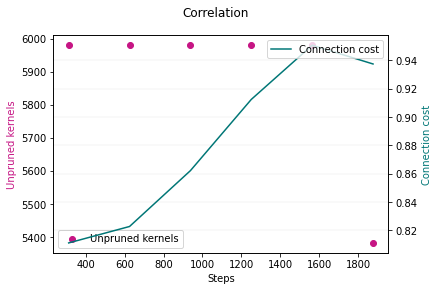

In [149]:
import matplotlib.pyplot as plt
import numpy as np

train_df = df[['step', 'unpruned', 'train_cc']].dropna()
x = train_df['step']
y1 = train_df['unpruned']
y2 = train_df['train_cc']


# Create a figure and a primary axis
fig, ax1 = plt.subplots()

# Plot the line on the primary y-axis (values 0-1)
ax1.scatter(x, y1, color=variint_map_b.colors[-1], label='Unpruned kernels')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Unpruned kernels', color=variint_map_b.colors[-1])
ax1.tick_params(axis='y') # , labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the scatter on the secondary y-axis (values around 8000)
ax2.plot(x, y2, color=variint_map_b.colors[0], label='Connection cost')
ax2.set_ylabel('Connection cost', color=variint_map_b.colors[0])
ax2.tick_params(axis='y') # , labelcolor='red')

# Add a title and show the legend
fig.suptitle('Correlation')
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')

plt.grid(color='k', linestyle='-', linewidth=0.05)


# Display the plot
plt.savefig(os.path.join(tmp_path, 'correlation_pruning_cc.png'))
plt.show()

In [150]:
val_df

,step,val_rec
1,312,0.490571
4,625,0.523841
7,938,0.539556
10,1251,0.535333
13,1564,0.573111
16,1877,0.559111


In [106]:
40*300

12000

In [ ]:
list(set(df['step']))

In [ ]:
df['val_loss'].dropna()